In [3]:
library('tidyverse')
library('reshape2')
library('boot')
library('gridExtra')

# library('GGally')
# install.packages('broom')
# install.packages('bootstrap')
# install.packages('gridExtra')

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [4]:
df <- read.csv(file = "C:/Users/mkarc/Gauus/Chess-analysis/chess_games.csv")

In [5]:
df <- na.omit(df)
df <- distinct(df)

In [6]:
df <-  df %>% mutate(
    white_win = ifelse(winner =='white',1,0),
    black_win = ifelse(winner =='black',1,0),
    draw = ifelse(winner =='draw',1,0)
)
df <- cbind(df,white_ranking_cat=(df$white_rating %/% 100 + 1) * 100)
df <- cbind(df,ranting_difrents=df$white_rating-df$black_rating)
df <- cbind(df,rating_diffrents_cat=(df$ranting_difrents %/% 100 + 1)* 100)
df <- cbind(df,turns_cat=(df$turns %/% 10 + 1)* 10)
head(df,1)

id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,opening_eco,opening_name,opening_ply,white_win,black_win,draw,white_ranking_cat,ranting_difrents,rating_diffrents_cat,turns_cat
TZJHLljE,False,1.50421e+12,1.50421e+12,13,outoftime,white,15+2,bourgris,1500,...,D10,Slav Defense: Exchange Variation,5,1,0,0,1600,309,400,20


In [7]:
openings <- vector()

for(i in 1:nrow(df)){
  
  opening_name <- df[i, c("opening_name")]
  
  if(str_detect(opening_name, ":") == TRUE){
    
    location <- str_locate(opening_name, ":")
    openings[i] <- str_sub(opening_name, 1, location[1,1] - 1)
  }
  
  else if(str_detect(opening_name, "#") == TRUE){
    
    location <- str_locate(opening_name, "#")
    openings[i] <- str_sub(opening_name, 1, location[1,1] - 2)
  }
  
  else if(str_detect(opening_name, "\\|") == TRUE){
    
    
    location <- str_locate(opening_name, "\\|")
    openings[i] <- str_sub(opening_name, 1, location[1,1] - 1)
  }
  
  else{
    
    openings[i] <- df[i, c("opening_name")]
    
  }
  
  
}

df["openings_general"] <- openings

### Analiza na podstawie rankingu białego 

In [8]:
samplemean <- function(x, d) {
    mean(x[d])
}
generate_data <- function(df, column, place){ 
    white_win <- numeric()
    white_win_bottom <- numeric()
    white_win_top <- numeric()
    black_win <- numeric()
    black_win_bottom <- numeric()
    black_win_top <- numeric()
    draw <- numeric()
    draw_bottom <- numeric()
    draw_top <- numeric()
    values <- numeric()

    for (value in sort(unique(column))) {
        # print(value)
        df2 <- df[which(column == value), ]
        if (count(df2) > 10  ) {
            # print("Tak")
            values <- append(values,value)
            white_ciboot <- boot.ci(boot(df2$white_win, samplemean, R = 1000), conf = 0.95, c("perc"))
            white_win <- append(white_win, white_ciboot$t0)
            white_win_bottom <- append(white_win_bottom, white_ciboot$perc[4])
            white_win_top <- append(white_win_top, white_ciboot$perc[5])

            black_ciboot <- boot.ci(boot(df2$black_win, samplemean, R = 1000), conf = 0.95, c("perc"))
            black_win <- append(black_win, black_ciboot$t0)
            black_win_bottom <- append(black_win_bottom, black_ciboot$perc[4])
            black_win_top <- append(black_win_top, black_ciboot$perc[5])

            draw_ciboot <- boot.ci(boot(df2$draw, samplemean, R = 1000), conf = 0.95, c("perc"))
            draw <- append(draw, draw_ciboot$t0)
            draw_bottom <- append(draw_bottom, draw_ciboot$perc[4])
            draw_top <- append(draw_top, draw_ciboot$perc[5])
            # print(draw_bottom)      
        }
    }
    new_df <- data.frame(values, white_win,white_win_top,white_win_bottom, black_win,black_win_top,black_win_bottom,draw,draw_bottom,draw_top)
    write_csv(new_df, place)
}

# print(new_df)

In [9]:
generate_data(df,df$white_ranking_cat, "C:/Users/mkarc/Gauus/Chess-analysis/winner_depend_ranting.csv")

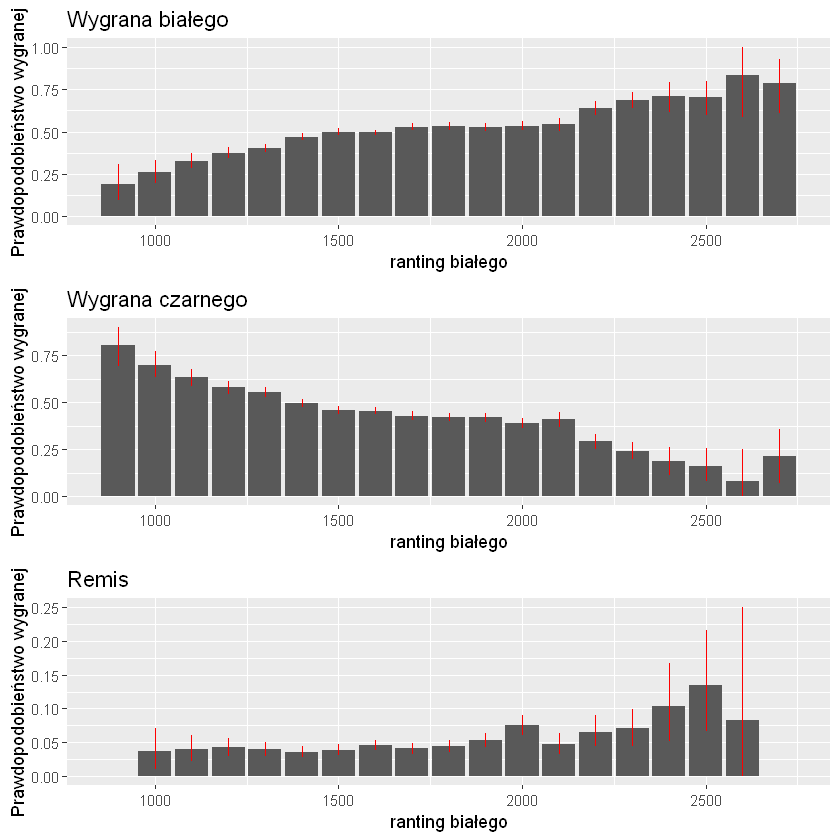

In [10]:
new_df = read.csv("C:/Users/mkarc/Gauus/Chess-analysis/winner_depend_ranting.csv")
plot_white <- ggplot(data=new_df,aes(x=values,y=white_win))  + geom_bar(stat='identity')+ geom_errorbar(aes(ymin=white_win_bottom,ymax=white_win_top),color = "red",width=.05)+
    labs(x = 'ranting białego', y = 'Prawdopodobieństwo wygranej' , title="Wygrana białego") 
plot_black <- ggplot(data=new_df,aes(x=values,y=black_win)) + geom_bar(stat='identity') + geom_errorbar(aes(ymin=black_win_bottom,ymax=black_win_top),color = "red",width=.05)+
    labs(x = 'ranting białego', y = 'Prawdopodobieństwo wygranej' , title="Wygrana czarnego") 
plot_draw <- ggplot(data=new_df,aes(x=values,y=draw)) + geom_bar(stat='identity')+ geom_errorbar(aes(ymin=draw_bottom,ymax=draw_top),color = "red",width=.05)+
    labs(x = 'ranting białego', y = 'Prawdopodobieństwo wygranej' , title="Remis") 


grid.arrange(plot_white,plot_black,plot_draw)

## Wynik od różnicy rantingu

In [11]:
generate_data(df,df$rating_diffrents_cat, "C:/Users/mkarc/Gauus/Chess-analysis/winner_depend_diffrents_ranting.csv")

ERROR while rich displaying an object: Error: geom_bar requires the following missing aesthetics: y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9.

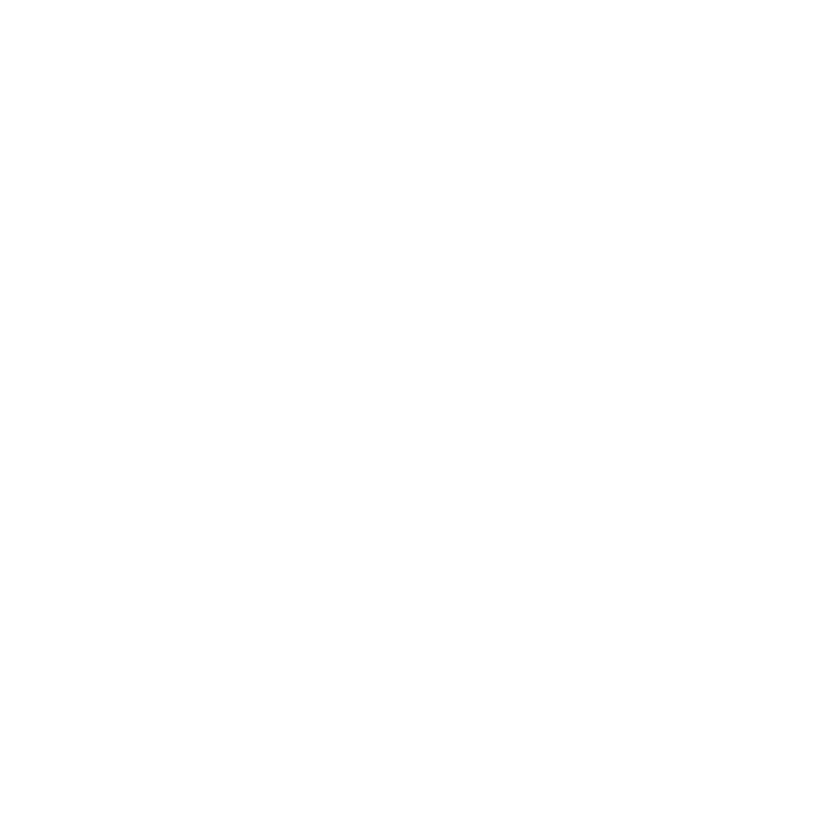

In [12]:
ggplot(data=df, mapping=aes(x=ranting_difrents)) +  geom_bar(stat='identity')+ 
    labs(x = 'różnica rantingu' , title="Rozkład  różnic rantingu") 

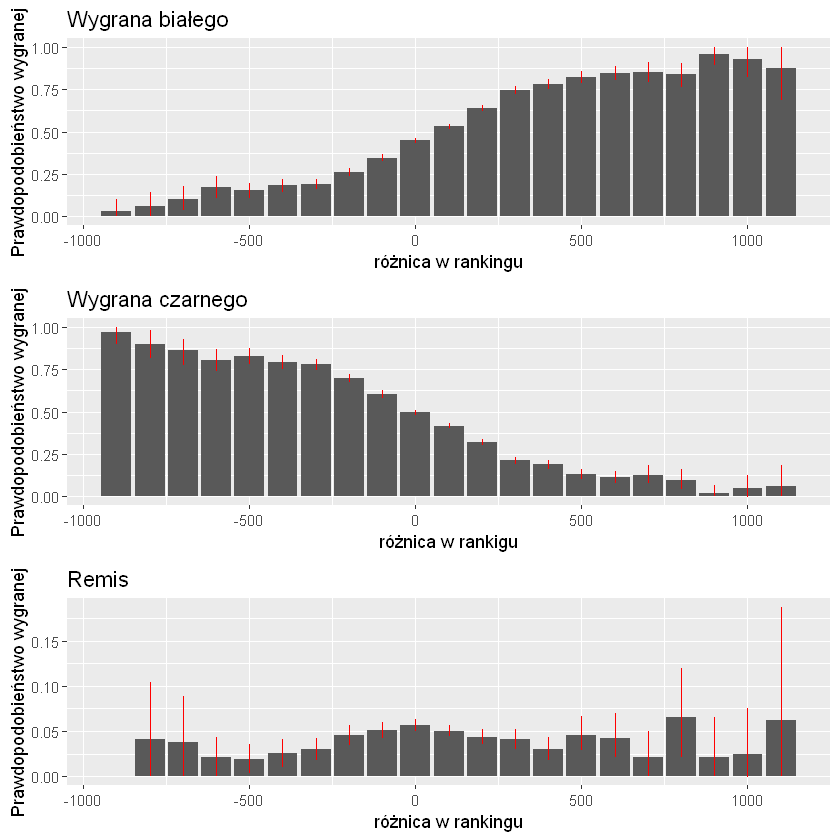

In [13]:
new_df = read.csv("C:/Users/mkarc/Gauus/Chess-analysis/winner_depend_diffrents_ranting.csv")
plot_white <- ggplot(data=new_df,aes(x=values,y=white_win))  + geom_bar(stat='identity')+ geom_errorbar(aes(ymin=white_win_bottom,ymax=white_win_top),color = "red",width=.05)+
    labs(x = 'różnica w rankingu', y = 'Prawdopodobieństwo wygranej' , title="Wygrana białego") 
plot_black <- ggplot(data=new_df,aes(x=values,y=black_win)) + geom_bar(stat='identity') + geom_errorbar(aes(ymin=black_win_bottom,ymax=black_win_top),color = "red",width=.05)+
    labs(x = 'różnica w rankigu', y = 'Prawdopodobieństwo wygranej' , title="Wygrana czarnego") 
plot_draw <- ggplot(data=new_df,aes(x=values,y=draw)) + geom_bar(stat='identity')+ geom_errorbar(aes(ymin=draw_bottom,ymax=draw_top),color = "red",width=.05)+
    labs(x = 'różnica w rankingu', y = 'Prawdopodobieństwo wygranej' , title="Remis") 


grid.arrange(plot_white,plot_black,plot_draw)

## Wynik od czasu

In [14]:
generate_data(df,df$turns_cat, "C:/Users/mkarc/Gauus/Chess-analysis/winner_depend_turns.csv")

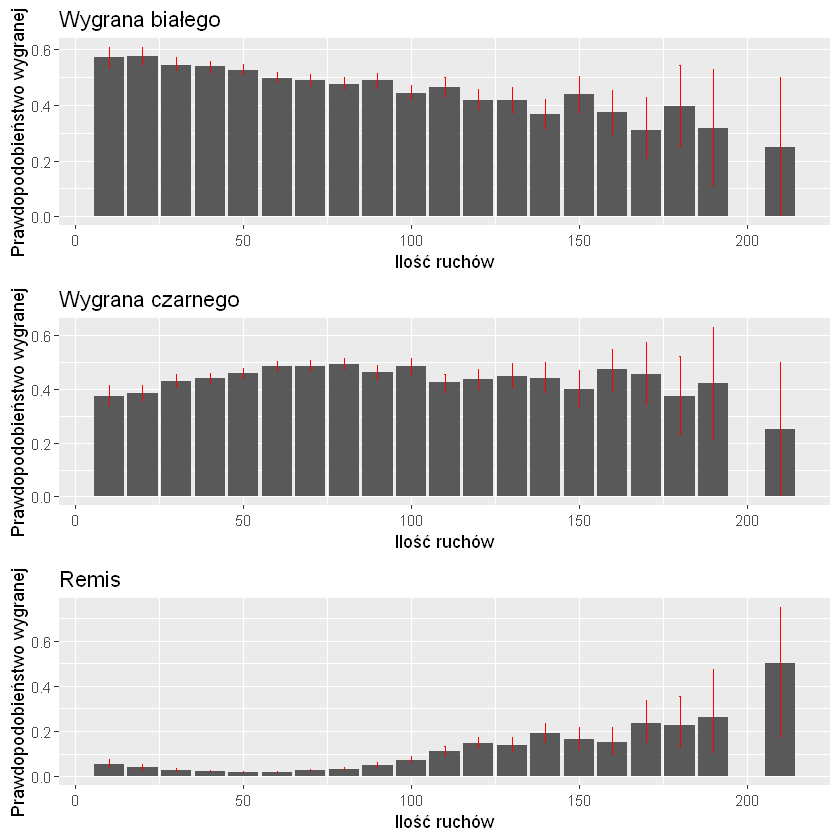

In [15]:
new_df = read.csv("C:/Users/mkarc/Gauus/Chess-analysis/winner_depend_turns.csv")
plot_white <- ggplot(data=new_df,aes(x=values,y=white_win))  + geom_bar(stat='identity')+ geom_errorbar(aes(ymin=white_win_bottom,ymax=white_win_top),color = "red",width=.05)+
    labs(x = 'Ilość ruchów', y = 'Prawdopodobieństwo wygranej' , title="Wygrana białego") 
plot_black <- ggplot(data=new_df,aes(x=values,y=black_win)) + geom_bar(stat='identity') + geom_errorbar(aes(ymin=black_win_bottom,ymax=black_win_top),color = "red",width=.05)+
    labs(x = 'Ilość ruchów', y = 'Prawdopodobieństwo wygranej' , title="Wygrana czarnego") 
plot_draw <- ggplot(data=new_df,aes(x=values,y=draw)) + geom_bar(stat='identity')+ geom_errorbar(aes(ymin=draw_bottom,ymax=draw_top),color = "red",width=.05)+
    labs(x = 'Ilość ruchów', y = 'Prawdopodobieństwo wygranej' , title="Remis") 

grid.arrange(plot_white,plot_black,plot_draw)